## Importing required packages and reading CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r'election.csv')

## Converting Yes and No to 1's and 0's

In [3]:
df[:10]

,Store,Location,State,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin,Result
0,Camp Road Hamburg,"Buffalo, NY",NY,No,12/9/2021,8,12,20,-0.20,No
1,Genessee St,"Buffalo, NY",NY,No,12/9/2021,15,9,24,0.25,Yes
2,Elmwood,"Buffalo, NY",NY,No,12/9/2021,19,8,27,0.41,Yes
3,Power & Baseline Road,"Mesa, AZ",AZ,Yes,2/25/2022,25,3,28,0.79,Yes
4,Sheridan & Bailey,"Buffalo, NY",NY,No,3/9/2022,15,12,27,0.11,Yes
5,Transit Commons / Depew,"Buffalo, NY",NY,No,3/9/2022,15,12,27,0.11,Yes
6,Broadway & Denny,"Seattle, WA",WA,No,3/22/2022,9,0,9,1.00,Yes
7,Crismon & Southern,"Mesa, AZ",AZ,Yes,3/25/2022,11,3,14,0.57,Yes
8,I-75 at Merchant Drive,"Knoxville, TN",TN,Yes,3/29/2022,8,7,15,0.07,Yes
9,New York Reserve Roastery,"New York, NY",NY,No,4/1/2022,46,36,82,0.12,Yes


In [4]:
df.columns
df.RTWState=df.RTWState.map({'Yes':1,'No':0})
df.Result=df.Result.map({'Yes':1,'No':0})

In [5]:
dummy=pd.get_dummies(df['State'])
df=df.drop('State',axis=1)
df=pd.concat([df,dummy],axis=1)
df

,Store,Location,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin,Result,AZ,...,MN,NC,NJ,NY,OR,PA,TN,VA,WA,WI
0,Camp Road Hamburg,"Buffalo, NY",0,12/9/2021,8,12,20,-0.20,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Genessee St,"Buffalo, NY",0,12/9/2021,15,9,24,0.25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Elmwood,"Buffalo, NY",0,12/9/2021,19,8,27,0.41,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Power & Baseline Road,"Mesa, AZ",1,2/25/2022,25,3,28,0.79,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Sheridan & Bailey,"Buffalo, NY",0,3/9/2022,15,12,27,0.11,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,52 Curtiss Pkwy,"Miami Springs, FL",1,5/10/2022,10,3,13,0.54,1,0,...,0,0,0,0,0,0,0,0,0,0
72,1980 Can Marco Blvd,"Jacksonville, FL",1,5/10/2022,8,1,9,0.78,1,0,...,0,0,0,0,0,0,0,0,0,0
73,1700 W Nursery Road,"Linthicum, MD",0,5/10/2022,15,2,17,0.76,1,0,...,0,0,0,0,0,0,0,0,0,0
74,San Jose Blvd & Ricky Drive,"Jacksonville, FL",1,5/10/2022,10,7,17,0.18,1,0,...,0,0,0,0,0,0,0,0,0,0


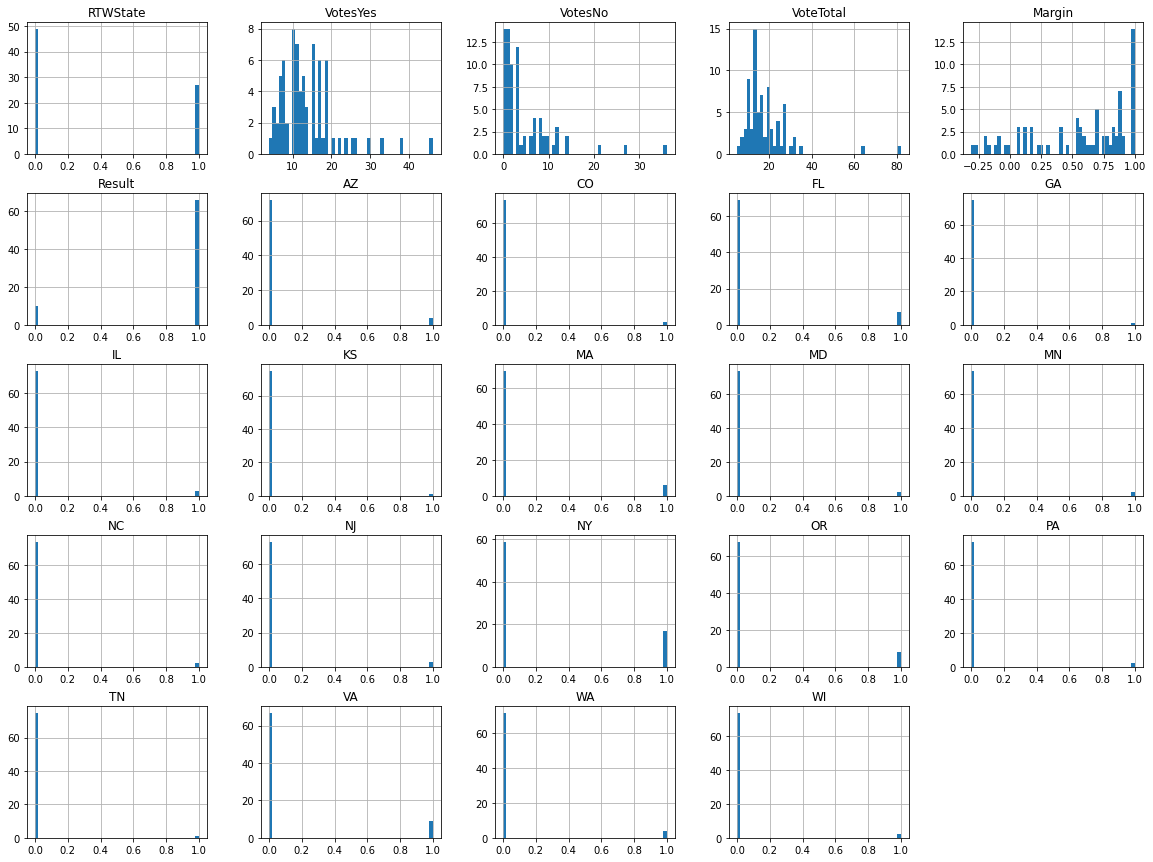

In [6]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
X=df.drop(['VoteCountDate','Location','Store'],axis=1)

In [8]:
X

,RTWState,VotesYes,VotesNo,VoteTotal,Margin,Result,AZ,CO,FL,GA,...,MN,NC,NJ,NY,OR,PA,TN,VA,WA,WI
0,0,8,12,20,-0.20,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,15,9,24,0.25,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,19,8,27,0.41,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,25,3,28,0.79,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,15,12,27,0.11,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,10,3,13,0.54,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
72,1,8,1,9,0.78,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
73,0,15,2,17,0.76,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,1,10,7,17,0.18,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting target

In [9]:
X=X.drop('Result',axis=1)
Y=df.Result

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
x_train

,RTWState,VotesYes,VotesNo,VoteTotal,Margin,AZ,CO,FL,GA,IL,...,MN,NC,NJ,NY,OR,PA,TN,VA,WA,WI
9,0,46,36,82,0.12,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,15,12,27,0.11,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34,0,14,0,14,1.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,1,11,2,13,0.69,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30,1,13,14,27,-0.04,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,4,7,11,-0.27,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39,1,15,8,23,0.30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,0,19,1,20,0.90,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
64,1,7,6,13,0.08,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,5,6,11,-0.09,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [12]:
acc_score=accuracy_score(y_test,y_predict)

In [13]:
acc_score

1.0